In [2]:
# imports
import pandas as pd
import numpy as np
import wrangle as wr

# 1. Load your zillow dataset.

In [3]:
# acquire the zillow data
df = wr.create_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
# prep the data:
df = wr.prep_zillow(df)
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [5]:
# remove outliers
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:
        
        # For each column, it calculates the first quartile (q1) and 
        #third quartile (q3) using the .quantile() method, where q1 
        #corresponds to the 25th percentile and q3 corresponds to the 75th percentile.
        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [6]:
column_list = ['bedrooms','bathrooms','area','yearbuilt','taxamount']

In [8]:
df = remove_outliers(df, 1.4, column_list)

In [9]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
7,3,2.0,2077,646760,1926,7924.68,LA
18,3,1.0,1244,169471,1950,2532.88,LA
19,3,2.0,1300,233266,1950,3110.99,LA
20,3,2.0,1222,290492,1951,3870.25,LA
40,2,1.0,725,37548,1953,576.47,LA


In [10]:
#split the data
train, validate, test = wr.split_zillow_data(df)
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
582851,3,2.0,1708,792182,1927,9571.62,LA
237081,3,2.0,1785,99551,1964,1769.04,Ventura
1350929,3,1.0,1075,312262,1941,4321.27,LA
176874,3,2.0,2128,804983,1954,8906.61,LA
73233,3,3.0,1547,369282,1977,4541.56,Orange


# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
# X -> set of all ind features (just one here)
# y -> dependent variable, target.
X = train[['area']]
y = train['taxvalue']

In [14]:
# create the object
lm = LinearRegression()
# fit the object
lm.fit(X, y)
# use the object
yhat = lm.predict(X)

In [15]:
yhat[:10]

array([339020.01852097, 350839.79021281, 241852.28500235, 403491.50047646,
       314305.95043803, 342090.08909028, 362506.05837618, 336870.96912245,
       261040.22606053, 295425.01643679])

In [16]:
# import matplotlib stuff:
import matplotlib.pyplot as plt

# 3. Plot the residuals for the linear regression model that you made.

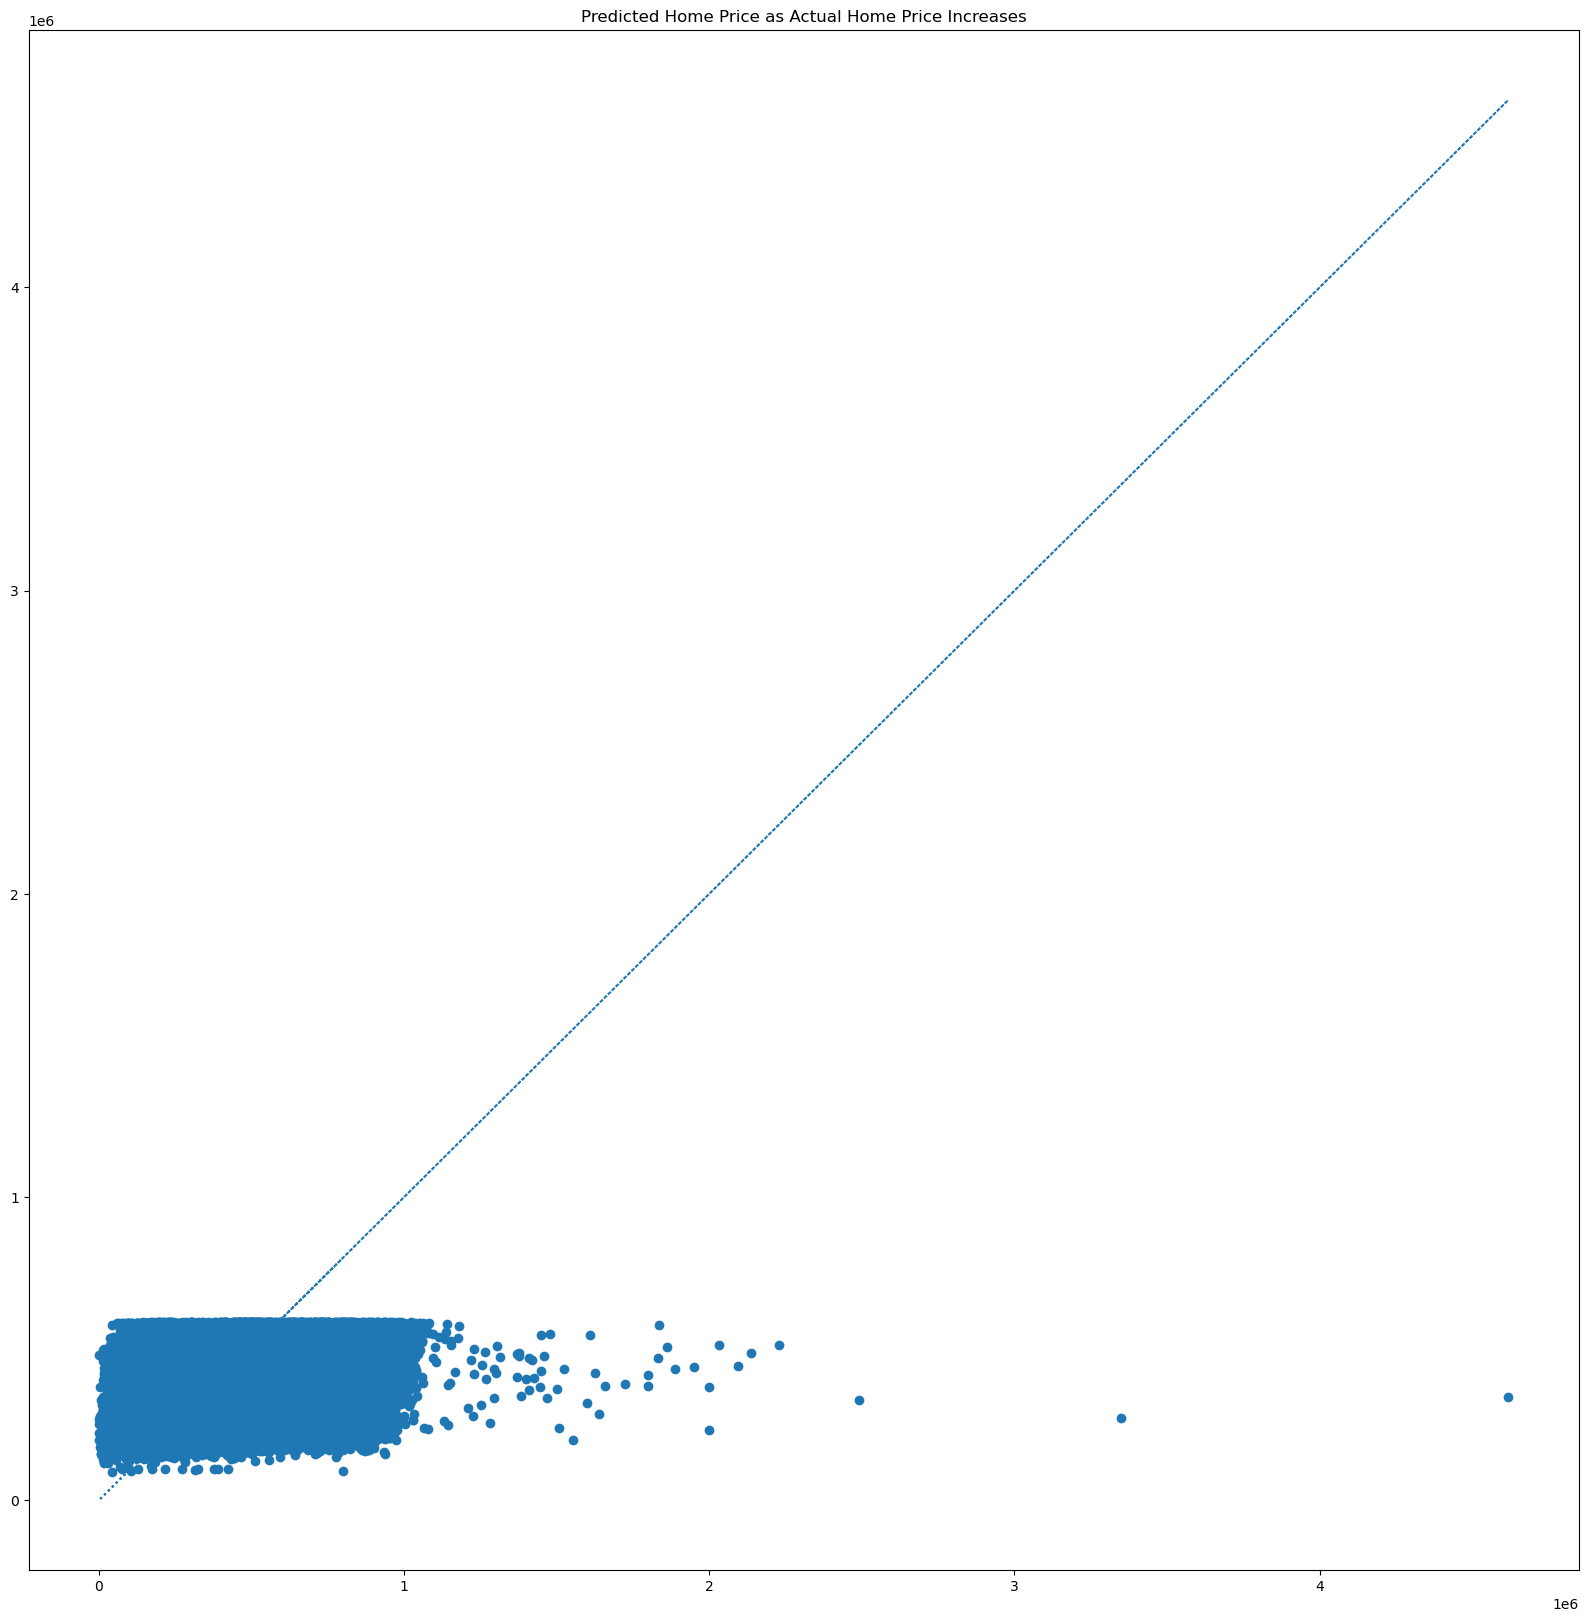

In [17]:
# plot residuals the first way
plt.figure(figsize=(20,20))
plt.scatter(y, yhat)
# x=x is y=y here, the cases where the vert axis matches the horiz axis
plt.plot(y,y, ls=':')
plt.title('Predicted Home Price as Actual Home Price Increases')
plt.show()

# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
mean_baseline = y.mean()
med_baseline = y.median()

In [20]:
y_pred = pd.DataFrame(
{
    'y_act': y.values,
    'yhat': yhat,
    'mean_baseline' : mean_baseline,
    'med_baseline': med_baseline
}, index=train.index)

In [21]:
# compute the error on these two baselines:
mean_baseline_rmse = mean_squared_error(y_pred.mean_baseline, y) ** (1/2)
med_baseline_rmse = mean_squared_error(y_pred.med_baseline, y) ** (1/2)


In [22]:
mean_baseline_rmse < med_baseline_rmse

True

In [24]:
#  mean providees our best baseline,
print(f'Root mean squared error for the mean value of home price is ${round(mean_baseline_rmse, 3)}.')

Root mean squared error for the mean value of home price is $200761.446.


# 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount) 

In [25]:
# Squared Errors, 
# residuals squared
squared_errors = (y_pred['y_act'] - y_pred['yhat']) ** 2
# Sum of Squared Error, 
sse = squared_errors.sum()
# Mean Squared error, 
mse = sse / train.shape[0] #alternatively, len(train), y_pred.shape[0]
# Root mean Squared Error
# square root the mean squared error!
rmse = mse**0.5

In [26]:
rmse

181962.64057688153

# 6.Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model. 

In [28]:
sse #sse for our linear regression as computed above

3.306901456250423e+16

In [29]:
y_pred.columns

Index(['y_act', 'yhat', 'mean_baseline', 'med_baseline'], dtype='object')

In [30]:
# do that calculation again for our baseline
# Squared Errors, 
# residuals squared
squared_errors_bl = (y_pred['y_act'] - y_pred['mean_baseline']) ** 2
# Sum of Squared Error, 
sse_bl = squared_errors_bl.sum()

In [31]:
sse, sse_bl

(3.306901456250423e+16, 4.025477688400819e+16)

In [32]:
sse_bl > sse

True

# 7. What is the amount of variance explained in your model?

In [27]:
# ESS = Δ(y_pred, y_mean)
ESS = ((y_pred['yhat'] - y_pred['mean_baseline']) ** 2).sum()